In [1]:
#Importing Library and setting environment path
import os
import sys
#set the path 
os.environ['SPARK_HOME'] = "C:/Spark"
sys.path.append("C:/Spark/bin")
sys.path.append("C:/Spark/python")
sys.path.append("C:/Spark/python/pyspark")
sys.path.append("C:/Spark/python/pyspark/lib")
sys.path.append("C:/Spark/python/pyspark/lib/pyspark.zip")
sys.path.append("C:/Spark/python/pyspark/lib/py4j-0.10.3-src.zip")
sys.path.append("C:/Program Files/Java/jre1.8.0_111/bin")

#Importing required Libraries
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext,Row
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## initiating varibles of interest
interestVariables = set(['ronaldo','messi'])

## Adding spark context 
sc = SparkContext("local[6]", "Twitterapi") ## Local with 6 cores, naming projects as Twitterapi

## Adding a spark streaming context
ssc = StreamingContext(sc, 20) ## Update in every twenty seconds

## Creating SQL context
sqlContext = SQLContext(sc)

## Local server where data is coming from tweepy
socket_stream = ssc.socketTextStream("localhost", 5555)
lines = socket_stream.window(60)

In [3]:
## Processing Dstream
lines_1 = lines.flatMap( lambda text: list(c.intersection(set(text.lower().split())))) \
.map( lambda word: (word,1)) \
.reduceByKey( lambda a, b: a + b) \
.map(lambda rec: Row(rec[0], str(rec[1])))

## Saving Dstream output for each RDD in temporary tweets database
lines_1.foreachRDD(lambda rdd: rdd.toDF().registerTempTable("tweets"))
#lines_1.pprint()
ssc.start()

Plot Generated:
 2017-01-20 
 02:44:08


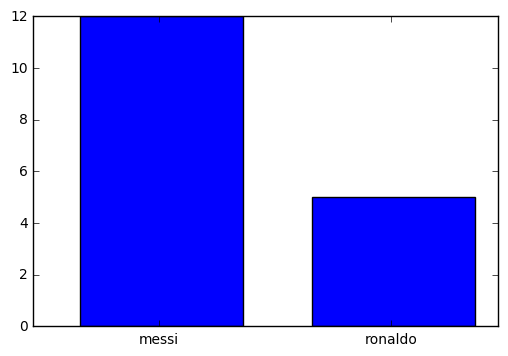

Plot Generated:
 2017-01-20 
 02:44:24


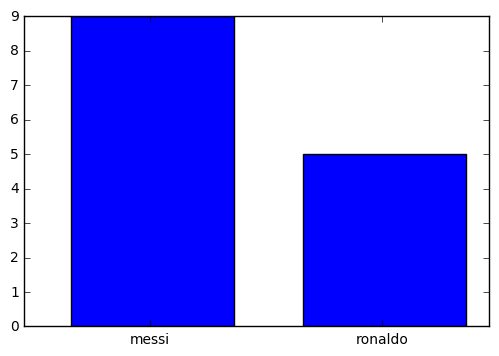

Plot Generated:
 2017-01-20 
 02:44:39


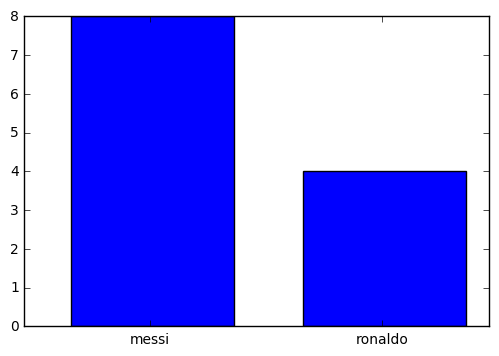

In [ ]:
# Plotting popularity of Ronaldo and Messi from live twitter stream
while True:
    try:
        x = sqlContext.sql("SELECT * from tweets").toPandas()
        x.columns = ['Names','Tweet_count']
        x.index = x['Names']
        x['Tweet_count'] = x['Tweet_count'].astype(dtype='int64')
        print('Plot Generated:\n {:%Y-%m-%d \n %H:%M:%S}'.format(datetime.now()))
        p1 = plt.bar([1,1.5],list(x['Tweet_count']),width=0.35)
        plt.xticks([1.17,1.67],list(x['Names']))
        plt.show()
        time.sleep(10)
    except:
        pass